<h1>Linear Regression </h1>   

Read more at https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<H1>Read Data from CSV

In [4]:
#dfTrain = pd.read_csv('../input/HousePriceDS/HousePriceData.csv')   #Training Dataset
import requests
import io
url="https://manmohan291.s3.ap-south-1.amazonaws.com/HousePriceDS/HousePriceData.csv"
s=requests.get(url).content
dfTrain=pd.read_csv(io.StringIO(s.decode('utf-8')))

dfTrain.head()

,FloorArea,BedRooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


<h5> Visualize Data

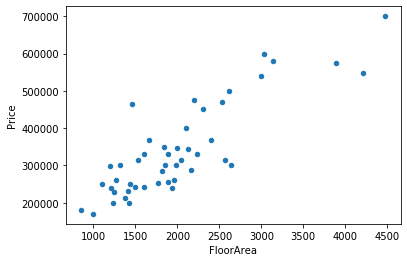

In [5]:
dfTrain.plot(x='FloorArea',y='Price',kind='scatter')
plt.show()

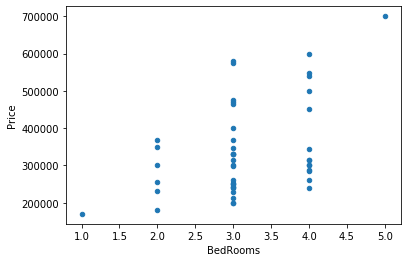

In [6]:
dfTrain.plot(x='BedRooms',y='Price',kind='scatter')
plt.show()

# Visualize in 3D

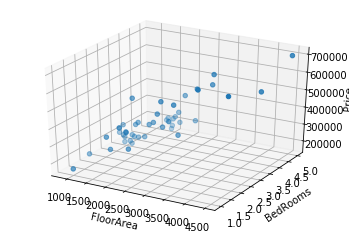

In [7]:
#%matplotlib notebook
plt3D = plt.figure().gca(projection='3d')
plt3D.scatter(dfTrain['FloorArea'], dfTrain['BedRooms'], dfTrain['Price'])
plt3D.set_xlabel('FloorArea')
plt3D.set_ylabel('BedRooms')
plt3D.set_zlabel('Price')
plt.show()

# Training

In [18]:
import sklearn.neighbors as KNN
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline

df_Features=dfTrain.iloc[:,0:2]
df_Label=dfTrain.iloc[:,2:3]

X=df_Features.values
Y=df_Label.values

SS=StandardScaler()

XS=SS.fit_transform(X)


K=3
RegObj=KNN.KNeighborsRegressor(n_neighbors = K).fit(XS,Y)


# Prediction

In [19]:
RegObj.predict(SS.transform([[100,2]]))[0][0]

237266.66666666666

# Plotting

In [20]:
x_min, x_max = X[:, 0].min() , X[:, 0].max() 
y_min, y_max = X[:, 1].min() , X[:, 1].max() 
u = np.linspace(x_min, x_max,10) 
v = np.linspace(y_min, y_max, 10) 

z = np.zeros(( len(u), len(v) )) 

U,V=np.meshgrid(u,v)


for i in range(len(u)): 
    for j in range(len(v)): 
        uv= np.column_stack((np.array([[u[i]]]),np.array([[v[j]]])))
        uv=SS.transform(uv)
        pv =RegObj.predict(uv)
        
        z[i,j] =pv[0][0]
z = np.transpose(z) 

<IPython.core.display.Javascript object>


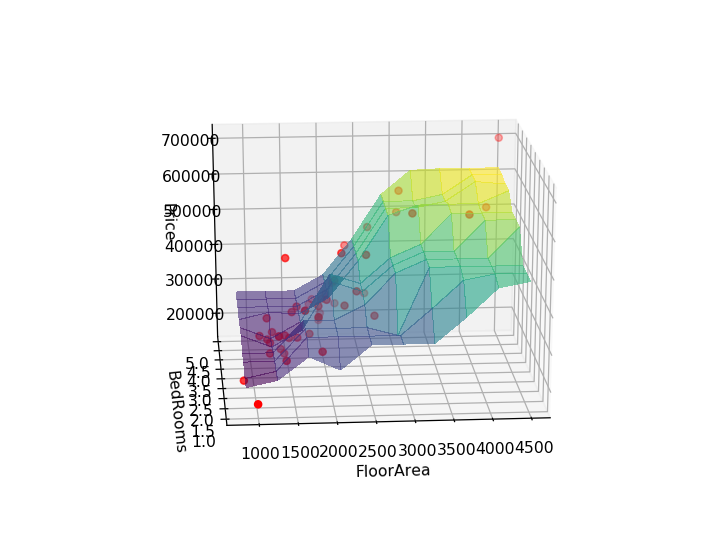

In [32]:
%matplotlib notebook
fig = plt.figure()
plt3D = fig.add_subplot(111, projection='3d')   
plt3D.scatter(X[:,0],X[:,1],Y,marker="o",color="r")
 
plt3D.plot_surface(U,V,z,alpha=0.6,antialiased=False, shade=False,cmap='viridis')
plt3D.set_xlabel('FloorArea')
plt3D.set_ylabel('BedRooms')
plt3D.set_zlabel('Price')
plt.show()

# RMSE

In [16]:
from sklearn.metrics import mean_squared_error
pY=RegObj.predict(X)
mse=mean_squared_error(Y, pY)
rmse=np.sqrt(mse)
print("RMSE={0:.2f}".format(rmse))

RMSE=0.00
